In [1]:
import numpy as np
import pandas as pd
import nibabel as nib

from os.path import join
from nilearn import plotting

/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
PROJ_DIR = "/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_clustering/"
DATA_DIR = "data/"
FIGS_DIR = "figures/"
OUTP_DIR = "output/"
RESR_DIR = "resources/"

In [3]:
gordon_og = '/Users/katherine.b/Dropbox/Mac/Downloads/Parcels 2/Parcels_MNI_222.nii'
gordon_xl = '/Users/katherine.b/Dropbox/Mac/Downloads/Parcels 2/Parcels.xlsx'

In [4]:
gordon_nii = nib.load(gordon_og)

In [5]:
gordon_arr = gordon_nii.get_fdata()

In [6]:
mapping = pd.read_excel(gordon_xl, index_col=0)

/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [7]:
mapping.head()

,Hem,Surface area (mm2),Centroid (MNI),Community
ParcelID,,,,
1,L,1411.6436,-11.2 -52.4 36.5,Default
2,L,377.2543,-18.8 -48.7 65,SMhand
3,L,437.1466,-51.8 -7.8 38.5,SMmouth
4,L,368.6362,-11.7 26.7 57,Default
5,L,870.9255,-18.4 -85.5 21.6,Visual


In [8]:
networks = list(mapping['Community'].unique())

In [9]:
print(networks)

['Default', 'SMhand', 'SMmouth', 'Visual', 'FrontoParietal', 'Auditory', 'None', 'CinguloParietal', 'RetrosplenialTemporal', 'CinguloOperc', 'VentralAttn', 'Salience', 'DorsalAttn']


In [10]:
gordon2abcd = {'Default': 'dt', 
               'SMhand': 'smh', 
               'SMmouth': 'smm', 
               'Visual': 'vs', 
               'FrontoParietal': 'fo', 
               'Auditory': 'ad', 
               'None': 'n', 
               'CinguloParietal': 'ca', 
               'RetrosplenialTemporal': 'rspltp', 
               'CinguloOperc': 'cgc', 
               'VentralAttn': 'vta', 
               'Salience': 'sa', 
               'DorsalAttn': 'dla'}


In [11]:
for i in range(len(networks)):
    indices = mapping[mapping['Community'] == networks[i]].index
    for j in indices:
        mapping.loc[j,'ntwk_label'] = i + 1
        mapping.loc[j,'abcd_label'] = gordon2abcd[networks[i]]

In [12]:
new_gordon_arr = np.zeros_like(gordon_arr)

In [13]:
for i in mapping.index:
    new_gordon_arr[np.where(gordon_arr == i)] = mapping.loc[i,'ntwk_label']


In [14]:
new_gordon_nii = nib.Nifti2Image(new_gordon_arr, gordon_nii.affine)

/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


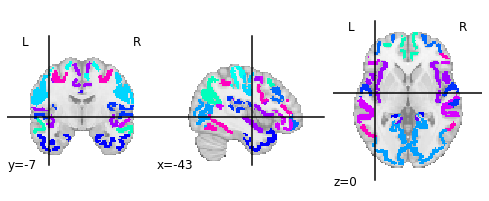

In [15]:
plotting.plot_stat_map(new_gordon_nii, cmap='gist_rainbow', colorbar=False)

In [16]:
out_path = join(PROJ_DIR, RESR_DIR, 'gordon_networks_222')

nib.save(new_gordon_nii, 
         f'{out_path}.nii')

mapping.to_csv(f'{out_path}.csv')

In [17]:
abcd_mapping = pd.read_csv(join(PROJ_DIR, DATA_DIR, 'variable_to_nifti_mapping.csv'), header=0, index_col=0)

In [18]:
list(gordon2abcd.keys())[list(gordon2abcd.values()).index('dt')]

'Default'

In [19]:
rsfcntwks = abcd_mapping.filter(regex='.*_c_', axis=0).index

In [20]:
mapping[mapping['abcd_label'] == 'dt']['ntwk_label'].unique()[0]

1.0

In [21]:
abcd_mapping.loc[rsfcntwks, 'atlas'] = 'Gordon Networks'
abcd_mapping.loc[rsfcntwks, 'atlas_fname'] = f'{out_path}.nii'
for i in rsfcntwks:
    abcd_ntwk = i.split('_')[3]
    gordon_ntwk = list(gordon2abcd.keys())[list(gordon2abcd.values()).index(abcd_ntwk)]
    abcd_mapping.loc[i, 'atlas_description'] = gordon_ntwk
    value = mapping[mapping['abcd_label'] == abcd_ntwk]['ntwk_label'].unique()[0]
    abcd_mapping.loc[i, 'atlas_value'] = value

In [22]:
abcd_mapping.to_csv(join(PROJ_DIR, DATA_DIR, 'variable_to_nifti_mapping.csv'))